# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/ride_data.csv"
ride_data_to_load = "Resources/city_data.csv"


# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [3]:
pyber_data_df.tail()

,city,driver_count,type,date,fare,ride_id
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128
2374,South Saramouth,7,Rural,2019-04-12 18:11:50,57.23,5081198789583


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()[["ride_id"]]
total_rides

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [5]:
# 2. Get the total drivers for each city type
total_drivers = ride_data_df.groupby("type").sum()[["driver_count"]]
total_drivers

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [6]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby("type").sum()[["fare"]]
total_fares.rename(columns = {"fare": "Total Fares"}, inplace = True)
total_fares

,Total Fares
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [7]:
#  4. Get the average fare per ride for each city type. 
# calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
avg_fare = pyber_data_df.groupby("type").mean()[["fare"]]
avg_fare.rename(columns = {"fare": "Average Fare/Ride"}, inplace = True)
avg_fare

,Average Fare/Ride
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [8]:
# 5. Get the average fare per driver for each city type. 
# calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
avg_fare_driver = pd.DataFrame(total_fares["Total Fares"]/total_drivers["driver_count"])
avg_fare_driver

,0
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [9]:
#  6. Create a PyBer summary DataFrame. 
list_df = [total_rides, total_drivers, total_fares, avg_fare, avg_fare_driver]
pyber_summary_df = pd.concat(list_df, axis = 1)
pyber_summary_df

,ride_id,driver_count,Total Fares,Average Fare/Ride,0
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,ride_id,driver_count,Total Fares,Average Fare/Ride,0
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df.rename(columns = {"ride_id": "Total Rides", 
                                   "driver_count": "Total Drivers", 
                                   "fare":"Total Fares", 
                                   "fare": "Average Fare/Ride", 0:"Average Fare/Driver"})

,Total Rides,Total Drivers,Total Fares,Average Fare/Ride,Average Fare/Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,$13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,$14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,$17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,$10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,$23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,$58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,$44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,$31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,$11.87,170351888128


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_dates_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fare_dates_df

fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33
...                          ...
Urban 2019-05-08 04:20:00 $21.99
      2019-05-08 04:39:49 $18.45
      2019-05-08 07:29:01 $18.55
      2019-05-08 11:38:35 $19.77
      2019-05-08 13:10:18 $18.04

[2375 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_dates_df = fare_dates_df.reset_index()
fare_dates_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fare_dates_pivot = fare_dates_df.pivot(index="date", columns="type", values="fare")
fare_dates_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
2019-01-01 09:45:36,$43.69,NaN,NaN
2019-01-01 12:32:48,NaN,$25.56,NaN
2019-01-01 14:40:14,NaN,NaN,$5.42
2019-01-01 14:42:25,NaN,NaN,$12.31


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
dates_Jan_April = fare_dates_pivot.loc['2019-01-01':'2019-04-29']
dates_Jan_April

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,$11.46
2019-04-28 16:29:16,NaN,NaN,$36.42
2019-04-28 17:26:52,NaN,NaN,$31.43


In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
dates_Jan_April = dates_Jan_April.reset_index()
dates_Jan_April["date"] = pd.to_datetime(dates_Jan_April["date"])
dates_Jan_April = dates_Jan_April.set_index(['date'])

In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
dates_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   level_0   2196 non-null   int64  
 1   index     2196 non-null   int64  
 2   Rural     114 non-null    float64
 3   Suburban  573 non-null    float64
 4   Urban     1509 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 102.9 KB


In [37]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_rides_sum_df = dates_Jan_April.resample('W').sum()
week_rides_sum_df = week_rides_sum_df.drop(["level_0", "index"], axis = 1)
week_rides_sum_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


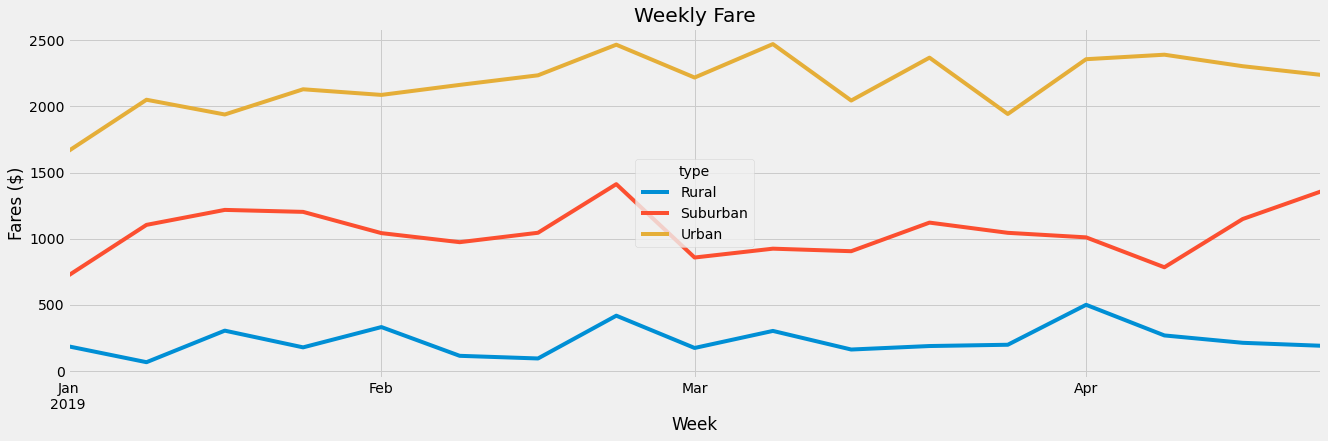

<Figure size 432x288 with 0 Axes>

In [44]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Plot the resampled DataFrame.
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fares = week_rides_sum_df.plot(figsize = (20,6))
# Add a title 
weekly_fares.set_title("Weekly Fare")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel("Week")
weekly_fares.set_ylabel("Fares ($)")
plt.savefig("Resources/fig8.png")
plt.show()
plt.tight_layout()